The used dataset:
https://www.kaggle.com/code/harshjain123/time-series-arima-sarima/input

this dataset has the monthly sales figures of champagne from Perrin Freres. This univariate time series dataset spans several years, capturing seasonal patterns in champagne sales.

# Useful Functions

In [95]:
# Function to assess model and visualize output
def model_assessment(train, test, predictions, chart_title):
  # Set the size of the plot to 10 inches by 4 inches
  plt.figure(figsize = (10,4))
  # Plot the train, test, and forecast data
  plt.plot(train, label = 'Train')
  plt.plot(test, label = 'Test')
  plt.plot(predictions, label = "Forecast")
  # add title and legend to the plot
  plt.title(f"Train, Test and Predictions with {chart_title}")
  plt.legend()
  plt.show()

  # Calculating the MAE, RMSE, and MAPE
  mae = mean_absolute_error(test, predictions)
  # Calculate RMSE by taking the square root of the output of mean_squared_error
  rmse = mean_squared_error(test, predictions)
  rmse = np.sqrt(mean_squared_error(test, predictions))
  mape = mean_absolute_percentage_error(test, predictions)

  # Print the calculated error metrics
  print(f"The MAE is {mae:.2f}")
  print(f"The RMSE is {rmse:.2f}")
  print(f"The MAPE is {100 * mape:.2f} %")

In [2]:
# Function to plot the future
def plot_future(y, forecast, title):
  # Set the size of the plot to 10 inches by 4 inches
  plt.figure(figsize = (10,4))
  # Plot the train and forecast data
  plt.plot(y, label = 'Train')
  plt.plot(forecast, label = "Forecast")
  # add title and legend to the plot
  plt.title(f"Train and Forecast with {title}")
  plt.legend()
  plt.show()

# Libraries and Data

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# %cd /content/drive/MyDrive/Python - Time Series Forecasting/Time Series Analysis/ARIMA, SARIMA and SARIMAX

In [5]:
!pip uninstall -y pmdarima numpy
!pip install numpy --upgrade
!pip install numpy==1.26.4 --force-reinstall --no-cache-dir



Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 211.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency r

In [6]:
!pip install pmdarima

  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.2 MB)


In [7]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from pmdarima import auto_arima, ARIMA, model_selection
import numpy as np
from sklearn.model_selection import ParameterGrid

In [56]:
# Loading the daily revenue data and set the date as uindex
df = pd.read_csv("Perrin Freres monthly champagne sales millions.csv",
                 index_col = "Month",
                 parse_dates = True,
                 dayfirst = True)

# Remove the problematic row before converting the index to datetime
df = df[df.index != 'Perrin Freres monthly champagne sales millions ?64-?72']

# Ensure the index is a DatetimeIndex
df.index = pd.to_datetime(df.index)
df.head()

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [11]:
# Information about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 1964-01 to Perrin Freres monthly champagne sales millions ?64-?72
Data columns (total 1 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1)
memory usage: 1.7+ KB


In [12]:
df.isnull().sum()

,0
Perrin Freres monthly champagne sales millions ?64-?72,2


In [57]:
#drop null

df.dropna(inplace = True)
df.isnull().sum()

,0
Perrin Freres monthly champagne sales millions ?64-?72,0


In [22]:
df

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01,2815.0
1964-02,2672.0
1964-03,2755.0
1964-04,2721.0
1964-05,2946.0
...,...
1972-05,4618.0
1972-06,5312.0
1972-07,4298.0


In [58]:
# Change the time Series variable name
df = df.rename(columns={df.columns[0]: 'y'})
df.head()

,y
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


unable to use .asfreq() on this data as the day date is randomly generated not the original

A list of commonly used `.asfreq()` aliases:

Time-based frequencies:

- 'D': Calendar day frequency
- 'B': Business day frequency
- 'W': Weekly frequency
- 'W-MON', 'W-TUE', ..., 'W-SUN': Weekly frequency (anchored on a specific day)
- 'M': Month end frequency
- 'MS': Month start frequency
- 'Q': Quarter end frequency
- 'QS': Quarter start frequency
- 'A' or 'Y': Year end frequency
- 'BA' or 'BY': Business year end frequency
- 'AS' or 'YS': Year start frequency
- 'BAS' or 'BYS': Business year start frequency


Hourly, minutely, and secondly frequencies:

- 'H': Hourly frequency
- 'T' or 'min': Minutely frequency
- 'S': Secondly frequency


You can also use multiples, like:

- '2D': Every 2 days
- '4H': Every 4 hours
- '15T' or '15min': Every 15 minutes

# Exploratory Data Analysis

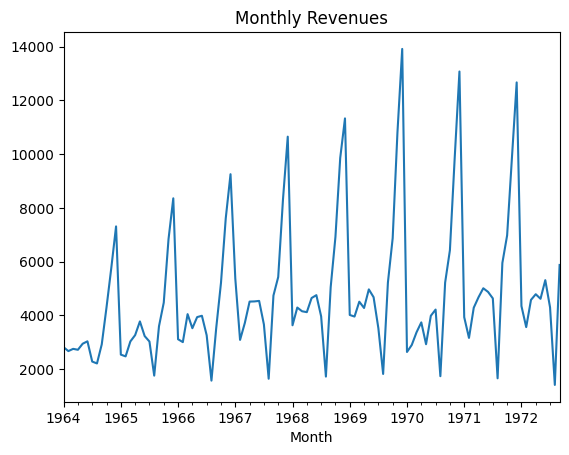

In [70]:
# Plotting the monthly seasonality of revenue values
df['y'].plot(title = 'Monthly Revenues')
plt.show()

In [64]:
df.head()

,y
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


<ipython-input-68-d9076d502709>:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df['y'].resample('Q').mean(),


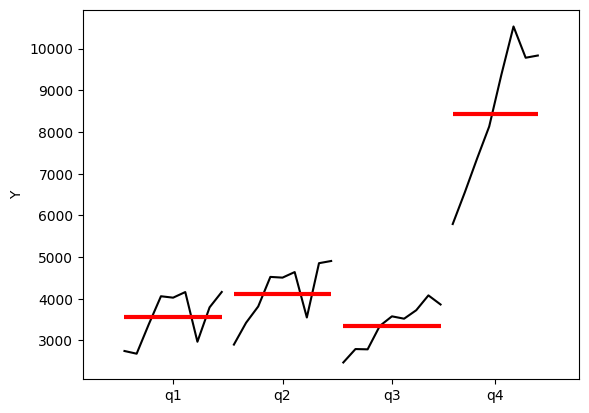

In [68]:
# quarter_plot() - To visualize seasonal patterns at a quarterly level.
# Q1 (january, february, march), Q2 (april, may, june), Q3 (july, august, september), Q4 (october, november, december)

# Plotting the quarterly seasonality of revenue values
# .resample('Q') - to convert the time series data into quarterly seasonality
quarter_plot(df['y'].resample('Q').mean(),
           ylabel = 'Y')
plt.show()

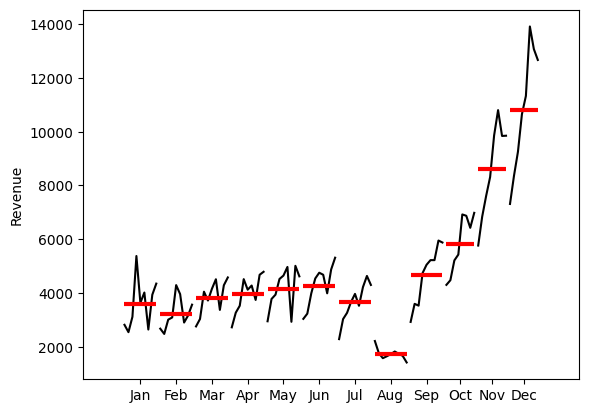

In [72]:
# month_plot() - To visualize the average value for each month across multiple years in a time series
# red lines - Represents the mean value for each month

# Plotting the monthly seasonality of revenue values
month_plot(df['y'].resample('M').mean(),
           ylabel = 'Revenue')
plt.show()

`seasonal_decompose` - To decompose a time series into its constituent parts to better understand the underlying patterns.

components

- Trend: The overall direction of the series (increasing, decreasing, or stable).
- Seasonal: Repeating patterns at fixed intervals (e.g., daily, weekly, monthly).
- Residual: The remaining variation after removing trend and seasonal components.

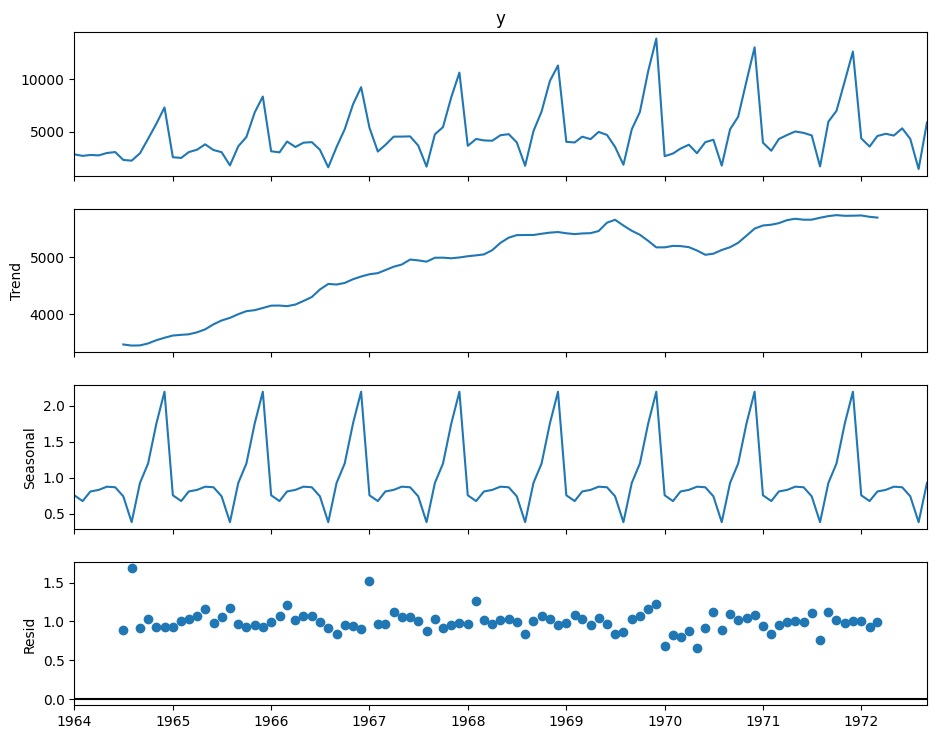

In [74]:
# Seasonal Decomposition Plots for Revenue Data
# Multiplicative model type, with Monthly seasonality
decomposition = seasonal_decompose(df['y'],
                                   model = 'mul',
                                   period = 12)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

Autocorrelation measures the correlation between a time series and a lagged version of itself.

Purpose: To identify patterns or repeating cycles in a time series dataset.

Interpretation:
- Values range from -1 to 1.
- 1 indicates perfect positive correlation.
- -1 indicates perfect negative correlation.
- 0 indicates no correlation.

ACF Plot:
- X-axis: Lag periods
- Y-axis: Correlation coefficient

Key Features:
- At lag 0, autocorrelation is always 1 (a series is perfectly correlated with itself).
- Significant spikes at certain lags indicate repeating patterns.


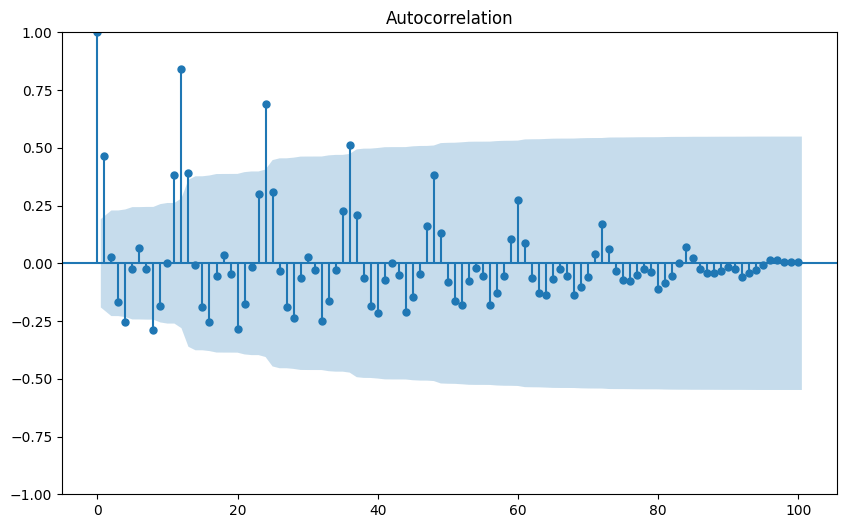

In [75]:
# Plot the autocorrelation (ACF) of revenue values
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df['y'], lags = 100, ax = ax)
plt.show()

PACF measures the correlation between a time series and its lag, after removing the effects of all shorter lags.

Purpose: To identify the direct relationship between an observation and its lag, without intermediate effects.

Main Difference between ACF and PACF:
- ACF: Measures overall correlation at each lag, including indirect effects.
- PACF: Measures direct correlation at each lag, excluding indirect effects.

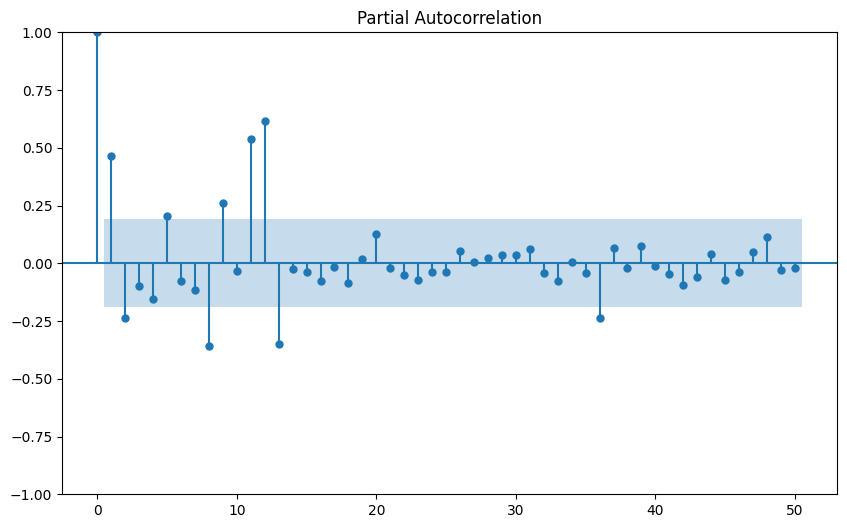

In [78]:
# Plot the partial autocorrelation (PACF) of revenue values
fig, ax = plt.subplots(figsize = (10,6))
plot_pacf(df['y'], lags = 50, ax = ax)
plt.show()

`.resample()` offset aliases:
- B = business day
- D = calendar day
- W = weekly
- M = month end
- BM = business month end
- MS = month start
- BMS = business month start
- Q = quarter end
- BQ = business quarter end
- QS = quarter start
- BQS = business quarter start
- A = year end
- BA = business year end
- AS = year start
- BAS = business year start
- h = hourly
- min = minutely
- s = secondly
- ms = milliseconds
- us = microseconds

# Stationarity

`adfuller` - used to perform the Augmented Dickey-Fuller test, which is a statistical test for testing the stationarity of a time series

 Stationarity implies that the statistical properties of the time series, such as mean and variance, do not change over time.

 The test evaluates a null hypothesis that the time series is non-stationary. If the p-value obtained from the test is less than a significance level (commonly 0.05), we reject the null hypothesis and conclude that the time series is stationary.

In [79]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
# 'result' contains the test statistic and the p-value.
result = adfuller(df.y)
print('p-value: %f' % result[1])

# Interpreting the results
if result[1] < 0.05:
    print("Evidence suggests that the time series is stationary.")
else:
    print("Evidence suggests that the time series is not stationary.")


p-value: 0.363916
Evidence suggests that the time series is not stationary.


In [80]:
# Compute the first difference of the 'y' column in DataFrame 'df' and assign it to a new column 'y_diff'.
# '.diff()' calculates the difference between consecutive elements along the specified axis (by default axis 0).
# 'dropna()' removes any rows with NaN values resulting from differencing.
df['y_diff'] = df.y.diff().dropna()
df['y_diff']

,y_diff
Month,
1964-01-01,NaN
1964-02-01,-143.0
1964-03-01,83.0
1964-04-01,-34.0
1964-05-01,225.0
...,...
1972-05-01,-170.0
1972-06-01,694.0
1972-07-01,-1014.0


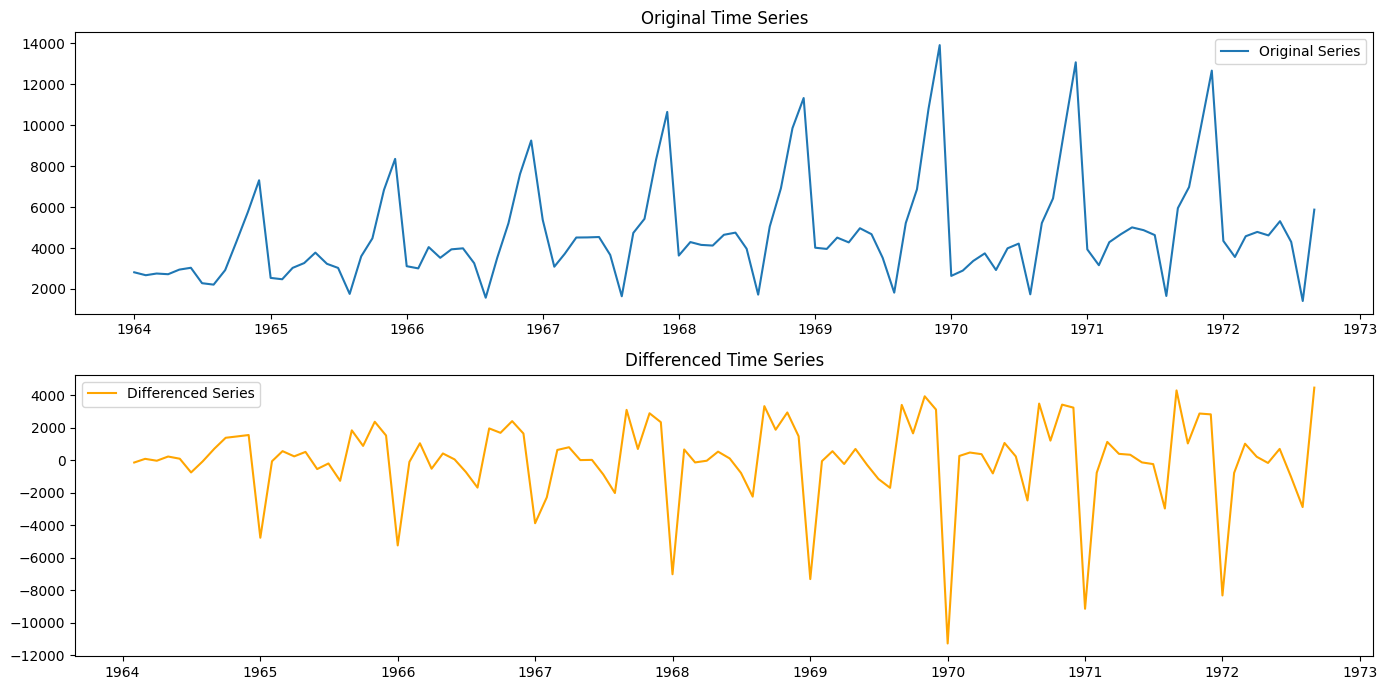

In [81]:
# Plotting the original and differenced series
# Set the size of the plot to 14 inches by 7 inches
plt.figure(figsize=(14, 7))

# Subplot for the original series
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(df.y, label='Original Series')
plt.title('Original Time Series')
plt.legend()

# Subplot for the differenced series
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.plot(df['y_diff'], label='Differenced Series', color='orange')
plt.title('Differenced Time Series')
plt.legend()

# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()
plt.show()

In [82]:
# Perform ADF test without null values
# 'result' contains the test statistic and the p-value.
result = adfuller(df['y_diff'].dropna())
print('p-value: %f' % result[1])

# Interpreting the results
if result[1] < 0.05:
    print("Evidence suggests that the time series is stationary.")
else:
    print("Evidence suggests that the time series is not stationary.")




p-value: 0.000000
Evidence suggests that the time series is stationary.


# ARIMA Model

In [108]:
# Split the Data into training and test
test_months = 30 # Number of days to reserve for testing
train, test = df.iloc[:-test_months], df.iloc[-test_months:]
test

,y,y_diff
Month,,
1970-04-01,3740.0,370.0
1970-05-01,2927.0,-813.0
1970-06-01,3986.0,1059.0
1970-07-01,4217.0,231.0
1970-08-01,1738.0,-2479.0
1970-09-01,5221.0,3483.0
1970-10-01,6424.0,1203.0
1970-11-01,9842.0,3418.0
1970-12-01,13076.0,3234.0


In [109]:
# auto_arima() from pmdarima - used to automatically select the optimal parameters for an ARIMA model based on the provided time series data.
# 'seasonal=False' indicates that the model should not consider seasonal components.
model = auto_arima(train['y'],
                   seasonal = False)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   75
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -682.895
Date:                Tue, 27 May 2025   AIC                           1367.790
Time:                        14:42:27   BIC                           1370.094
Sample:                    01-01-1964   HQIC                          1368.709
                         - 03-01-1970                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.988e+06   4.91e+05     12.197      0.000    5.03e+06    6.95e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):               154.36
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               3.54   Skew:                            -1.99
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [110]:
# Use the fitted ARIMA model to forecast future values.
# set the number of periods to forecast to the length of 'test'
predictions_arima = model.predict(n_periods = len(test))
predictions_arima

,0
1970-04-01,3370.0
1970-05-01,3370.0
1970-06-01,3370.0
1970-07-01,3370.0
1970-08-01,3370.0
1970-09-01,3370.0
1970-10-01,3370.0
1970-11-01,3370.0
1970-12-01,3370.0
1971-01-01,3370.0


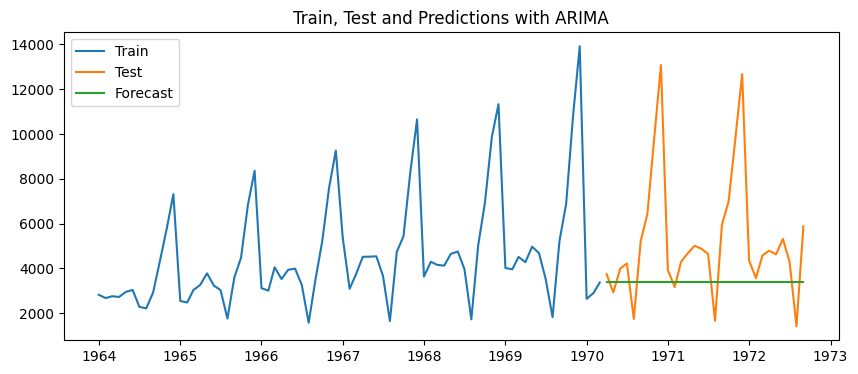

The MAE is 2281.83
The RMSE is 3338.07
The MAPE is 40.87 %


In [96]:
# Model assessment
model_assessment(train['y'], test['y'], predictions_arima, "ARIMA")

In [97]:
df.head()

,y,y_diff
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


# SARIMA

In [111]:
# auto_arima() from pmdarima - used to automatically select the optimal parameters for an ARIMA model based on the provided time series data.
# m = The number of periods in each season.(12 months)
model_sarima = auto_arima(train['y'],
                          m = 12)
model_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                   75
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                -505.396
Date:                  Tue, 27 May 2025   AIC                           1014.792
Time:                          14:42:57   BIC                           1019.079
Sample:                      01-01-1964   HQIC                          1016.478
                           - 03-01-1970                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    369.0159     92.920      3.971      0.000     186.895     551.136
sigma2      5.439e+05   7.29e+04      7.456      0.000    4.01e+05    6.87e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 6.15
Prob(Q):                              0.72   Prob(JB):                         0.05
Heteroskedasticity (H):               4.15   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [112]:
# Use the fitted SARIMA model to forecast future values.
# set the number of periods to forecast to the length of 'test'
predictions_sarima = model_sarima.predict(n_periods = len(test))
predictions_sarima

,0
1970-04-01,4645.015873
1970-05-01,5337.015873
1970-06-01,5046.015873
1970-07-01,3892.015873
1970-08-01,2190.015873
1970-09-01,5591.015873
1970-10-01,7241.015873
1970-11-01,11172.015873
1970-12-01,14285.015873
1971-01-01,3008.015873


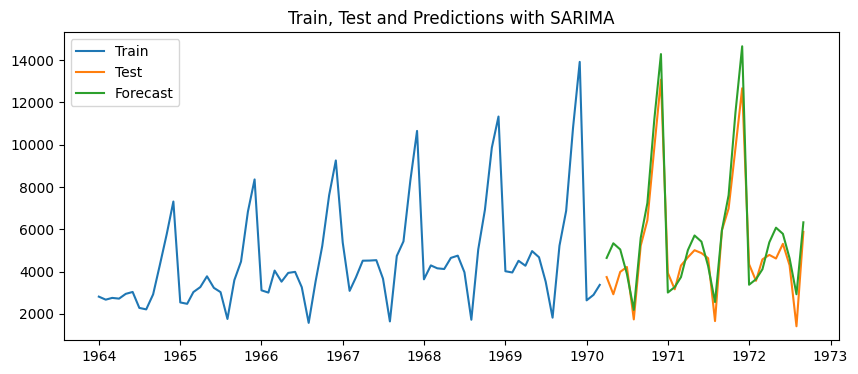

The MAE is 798.42
The RMSE is 979.28
The MAPE is 19.86 %


In [113]:
# Model assessment
model_assessment(train['y'], test['y'], predictions_sarima, "SARIMA")

- `MAE` - the average of the absolute differences between predicted and actual values.
- `RMSE` - the square root of the average of squared differences between prediction and actual observation.
It gives a relatively high weight to large errors, making it sensitive to outliers.
- `MAPE` - the size of the error in percentage terms. the average of the absolute percent errors of forecasts, which helps to understand the accuracy in terms of percentage.

# SARIMAX

In [125]:
# Split the Regressor Data into training and test
test_days = 30 # Number of days to reserve for testing
exog_train, exog_test = df.iloc[:-test_days,1:3], df.iloc[-test_days:,1:3]
exog_test.head()

,y_diff
Month,
1970-04-01,370.0
1970-05-01,-813.0
1970-06-01,1059.0
1970-07-01,231.0
1970-08-01,-2479.0


In [126]:
train['y']

,y
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1969-11-01,10803.0
1969-12-01,13916.0
1970-01-01,2639.0


In [127]:
exog_train

,y_diff
Month,
1964-01-01,NaN
1964-02-01,-143.0
1964-03-01,83.0
1964-04-01,-34.0
1964-05-01,225.0
...,...
1969-11-01,3931.0
1969-12-01,3113.0
1970-01-01,-11277.0


In [128]:
# fill null with median exog_train

exog_train = exog_train.fillna(exog_train.median())
print(exog_train.isnull().sum())

y_diff    0
dtype: int64


In [129]:
# auto_arima() from pmdarima - used to automatically select the optimal parameters for an ARIMA model based on the provided time series data.
# m = The number of periods in each season.
# X =  exogenous variables.
model_sarimax = auto_arima(train['y'],
                           m = 12,
                           X = exog_train
                           )
model_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   75
Model:             SARIMAX(2, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -476.038
Date:                            Tue, 27 May 2025   AIC                            962.076
Time:                                    14:46:56   BIC                            972.792
Sample:                                01-01-1964   HQIC                           966.291
                                     - 03-01-1970                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    335.1963     97.714      3.430      0.001     143.680     526.712
y_diff         0.4567      0.030     15.261      0.000       0.398       0.515
ar.L1          0.6565      0.106      6.183      0.000       0.448       0.865
ar.L2         -0.4143      0.084     -4.920      0.000      -0.579      -0.249
sigma2      2.179e+05   3.15e+04      6.928      0.000    1.56e+05     2.8e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):                 1.44
Prob(Q):                              0.54   Prob(JB):                         0.49
Heteroskedasticity (H):               1.76   Skew:                             0.11
Prob(H) (two-sided):                  0.20   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

AR --> y1(t)=0.5 * y(t-1) + 0.9 y(t-2)  + ....      --> 9

S --> y2(t) = 0.5 y(t-365) + 0.1 y(t - 365*2) - ......  --> +2
  
X --> y3(t) bla bla bla   --> +1

final y(t) = AR y(t) + S y(t) + X y(t) = 12





 --------    MA --> y(t) = 0.1 e(t-1) + 0.2 * e(t-2)  --> -1


 final final y(t) = final y(t) + MA y(t) = 12 - 1 = 11


In [130]:
# Use the fitted SARIMAX model to forecast future values.
# set the number of periods to forecast to the length of 'test'
# X - representing the exogenous variables for forecasting
predictions_sarimax = model_sarimax.predict(n_periods = len(test),
                                            X = exog_test)
predictions_sarimax

,0
1970-04-01,4661.912958
1970-05-01,5144.936205
1970-06-01,6150.444094
1970-07-01,4695.195689
1970-08-01,1800.635123
1970-09-01,5590.622605
1970-10-01,7081.898322
1970-11-01,11038.517006
1970-12-01,14443.327080
1971-01-01,4064.468267


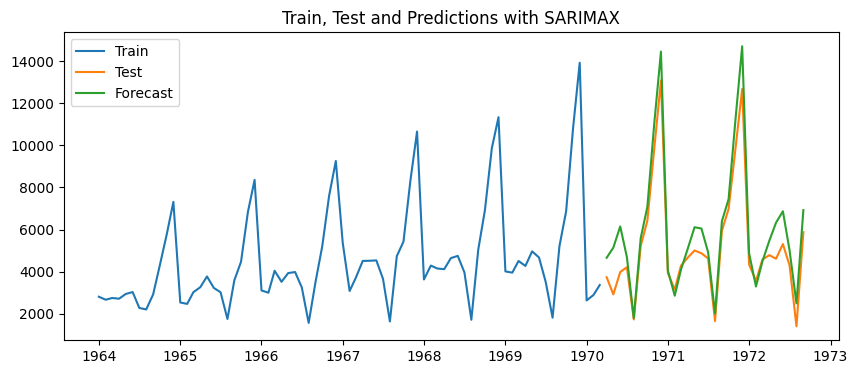

The MAE is 846.85
The RMSE is 1050.04
The MAPE is 18.92 %


In [131]:
# Model assessment
model_assessment(train['y'], test['y'], predictions_sarimax, "SARIMAX")

the best model performance is sarimax as it has the lowest MAPE of 18.92%